# Introduction

Here I will explain about the different creativity tests I implemented, as well as how to use the repo to test your own models. I will include code and hopefully plot some cool results.

# Text Modality

## Divergent Association Task (DAT)
This is a creativity test where a person/LLM is asked to name 10 words that are as different from each other as possible. \
Here is the actual prompt I ask the LLMs to answer:

''' \
**Please enter 10 words that are as different from each other as possible, \
in all meanings and uses of the words. Rules: Only single words in English. \
Only nouns (e.g., things, objects, concepts). No proper nouns (e.g., no specific people or places). \
No specialized vocabulary (e.g., no technical terms). \
Think of the words on your own (e.g., do not just look at objects in your surroundings). \
Make a list of these 10 words, a single word in each entry of the list. \
Do not write anything else, but the 10 words.** \
'''

Let's explore the effect of temperature on the creative score of a model.

### Effect of temperature on DAT creativity scores

In [1]:
import os
import json
import numpy as np
from google import genai
from google.genai import types
from langchain_text_splitters import RecursiveCharacterTextSplitter
from request import Request, run_request
from scipy.stats import norm
from datetime import datetime
from creative_tests.DAT import DivergentAssociationTest
from plot_results import plot_distribution_results, plot_correlation

/opt/homebrew/anaconda3/envs/DeepLearning/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Reading lines: 2196018it [00:16, 134437.40it/s]


In [ ]:
# Example Experiment

"""
test = DivergentAssociationTest(
    models=["gemini-2.0-flash"],
    configs=[{"temperature": 0.5} ,{"temperature": 1}, {"temperature": 1.5}, {"temperature": 2}],
    repeats=10,
    delay=5,
)

test.run()
"""

'\ntest = DivergentAssociationTest(\n    models=["gemini-2.0-flash"],\n    configs=[{"temperature": 0.5} ,{"temperature": 1}, {"temperature": 1.5}, {"temperature": 2}],\n    repeats=10,\n    delay=5,\n)\n\ntest.run()\n'

In [2]:
test = DivergentAssociationTest(
    models=["gemini-2.0-flash"],
    configs=[
        {"temperature": 0.5},
        {"temperature": 0.625},
        {"temperature": 0.75},
        {"temperature": 0.875},
        {"temperature": 1},
        {"temperature": 1.125},
        {"temperature": 1.25}, 
        {"temperature": 1.5},
        {"temperature": 1.625},
        {"temperature": 1.75},
        {"temperature": 1.875},
        {"temperature": 2},
    ],
    repeats=20,
    delay=6,
)

test.run(clean_response_file="responses/DAT_1models_12configs_10words_06-17_17:57:42_clean.json")

['results/DAT_1models_12configs_10words_06-23_16:35:17_unnormalized.json',
 'results/DAT_1models_12configs_10words_06-23_16:35:17_normalized.json']

/opt/homebrew/anaconda3/envs/DeepLearning/lib/python3.13/site-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


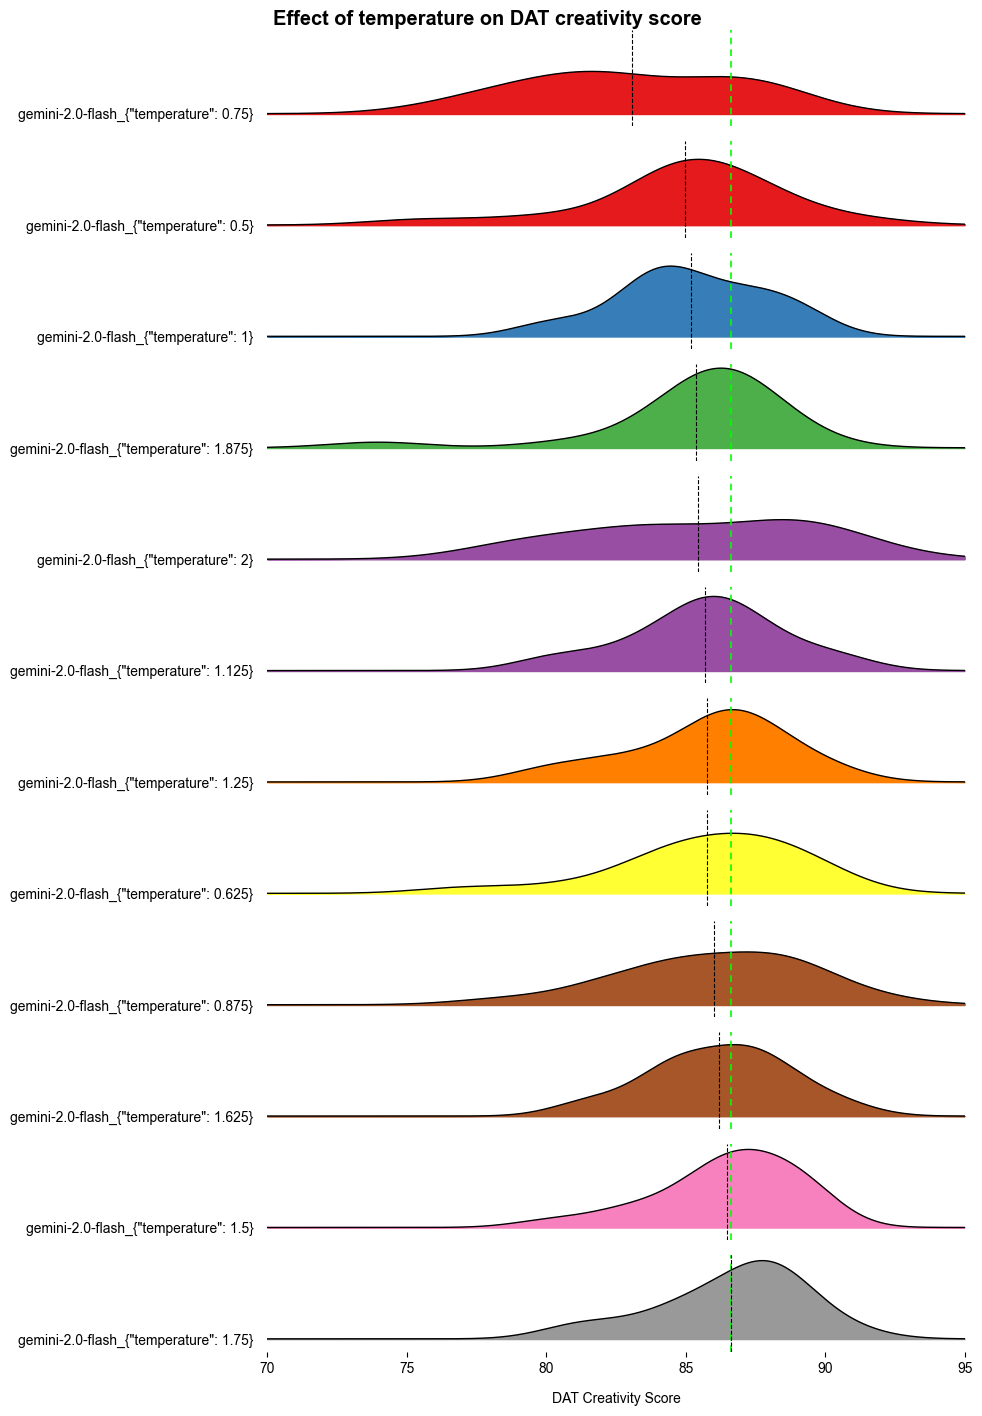

Benchmark (mean of top model 'gemini-2.0-flash_{"temperature": 1.75}'): 86.63


In [2]:
plot_distribution_results('./results/DAT_1models_12configs_10words_06-17_18:29:14_unnormalized.json',
                          dark_mode=False,
                          plot_title="Effect of temperature on DAT creativity score",
                          x_axis_title="DAT Creativity Score",
                          show_benchmark=True,
                          ascending=True,
                          x_min=70, 
                          x_max=95,
                          save_file=True, 
                          file_name="temperature_effect_on_creativity.png",
)

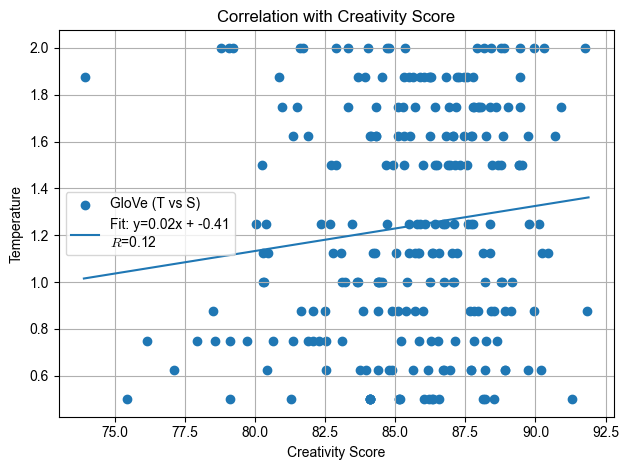

In [4]:
plot_correlation('./results/DAT_1models_12configs_10words_06-17_18:29:14_unnormalized.json',
                 'temperature',
                 second_key=None,
                 model='GloVe',
                 plot_title="Correlation with Creativity Score",
                 x_axis_title="Creativity Score",
                 y_axis_title="Temperature",
                 save_file=False, 
                 file_name="plot.png")

As we can see, there is a weak correlation in gemini-2.0-flash. Let's try running the same experiment, but sampling from different similar prompts.

In [5]:
test = DivergentAssociationTest(
    models=["gemini-2.0-flash"],
    configs=[
        {"temperature": 0.5},
        {"temperature": 0.625},
        {"temperature": 0.75},
        {"temperature": 0.875},
        {"temperature": 1},
        {"temperature": 1.125},
        {"temperature": 1.25}, 
        {"temperature": 1.5},
        {"temperature": 1.625},
        {"temperature": 1.75},
        {"temperature": 1.875},
        {"temperature": 2},
    ],
    standard_prompt=False, # <----- Difference with previous experiment
    repeats=20,
    delay=6,
)

test.run(clean_response_file='responses/DAT_1models_12configs_10words_06-17_19:17:27_clean.json')

['results/DAT_1models_12configs_10words_06-23_16:35:29_unnormalized.json',
 'results/DAT_1models_12configs_10words_06-23_16:35:29_normalized.json']

/opt/homebrew/anaconda3/envs/DeepLearning/lib/python3.13/site-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


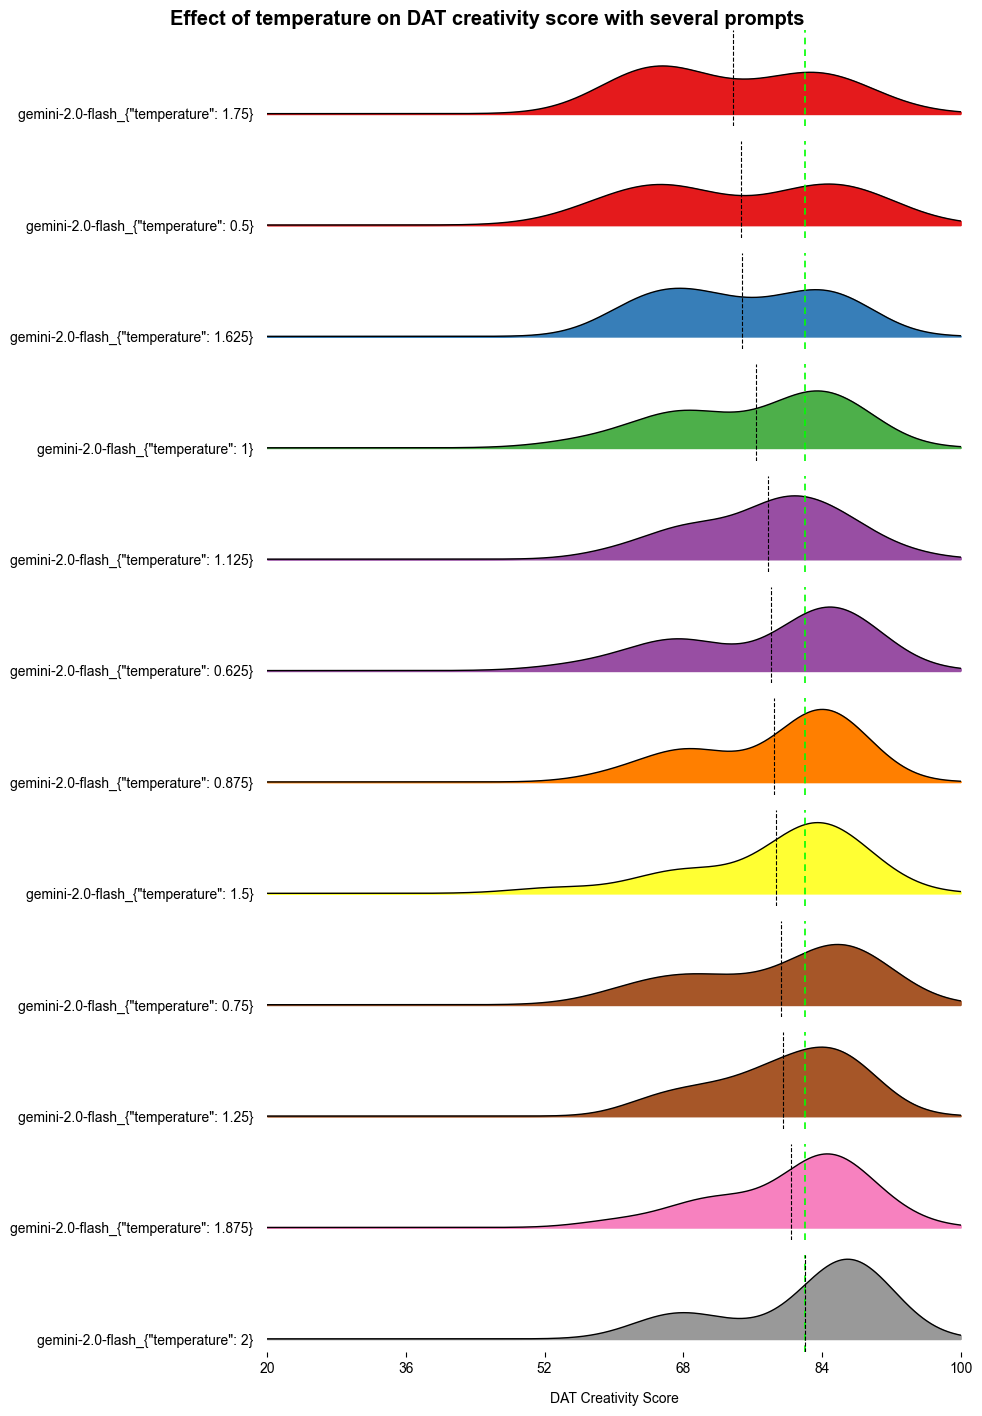

Benchmark (mean of top model 'gemini-2.0-flash_{"temperature": 2}'): 82.06


In [ ]:
plot_distribution_results('results/DAT_1models_12configs_10words_06-17_19:55:36_unnormalized.json',
                          dark_mode=False,
                          plot_title="Effect of temperature on DAT creativity score with several prompts",
                          x_axis_title="DAT Creativity Score",
                          show_benchmark=True,
                          ascending=True,
                          x_min=20, 
                          x_max=100,
                          save_file=True, 
                          file_name="temperature_effect_on_creativity_several_prompts.png",
)

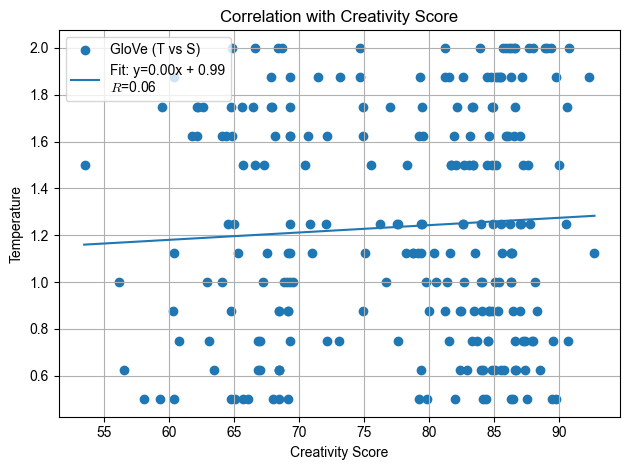

In [ ]:
plot_correlation('results/DAT_1models_12configs_10words_06-17_19:55:36_unnormalized.json',
                 'temperature',
                 second_key=None,
                 model=['GloVe'],
                 plot_title="Correlation with Creativity Score",
                 x_axis_title="Creativity Score",
                 y_axis_title="Temperature",
                 save_file=False, 
                 file_name="plot.png")

### Effect of thinking budget on DAT creativity scores

In [10]:
test = DivergentAssociationTest(
    models=["gemini-2.5-flash-lite-preview-06-17"],
    configs=[{"temperature": 1, "thinking_config": {"thinking_budget": 20}},
             {"temperature": 1, "thinking_config": {"thinking_budget": 50}},
             {"temperature": 1, "thinking_config": {"thinking_budget": 100}},
             {"temperature": 1, "thinking_config": {"thinking_budget": 200}},
             {"temperature": 1, "thinking_config": {"thinking_budget": 400}},
             {"temperature": 1, "thinking_config": {"thinking_budget": 300}},
             {"temperature": 1, "thinking_config": {"thinking_budget": 1000}},
             {"temperature": 1, "thinking_config": {"thinking_budget": 1500}},
             {"temperature": 1, "thinking_config": {"thinking_budget": 2000}},
             {"temperature": 1, "thinking_config": {"thinking_budget": 3000}},
             {"temperature": 1, "thinking_config": {"thinking_budget": 4500}},
             {"temperature": 1, "thinking_config": {"thinking_budget": 8000}},
             {"temperature": 1, "thinking_config": {"thinking_budget": 10000}},
             {"temperature": 1, "thinking_config": {"thinking_budget": 14000}},
             {"temperature": 1, "thinking_config": {"thinking_budget": 18000}},
             {"temperature": 1, "thinking_config": {"thinking_budget": 22000}},
    ],
    repeats=25,
    delay=7,
)

test.run(clean_response_file="./responses/DAT_1models_16configs_10words_06-18_00:15:12_clean.json")

['results/DAT_1models_16configs_10words_06-23_16:36:40_unnormalized.json',
 'results/DAT_1models_16configs_10words_06-23_16:36:40_normalized.json']

/opt/homebrew/anaconda3/envs/DeepLearning/lib/python3.13/site-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


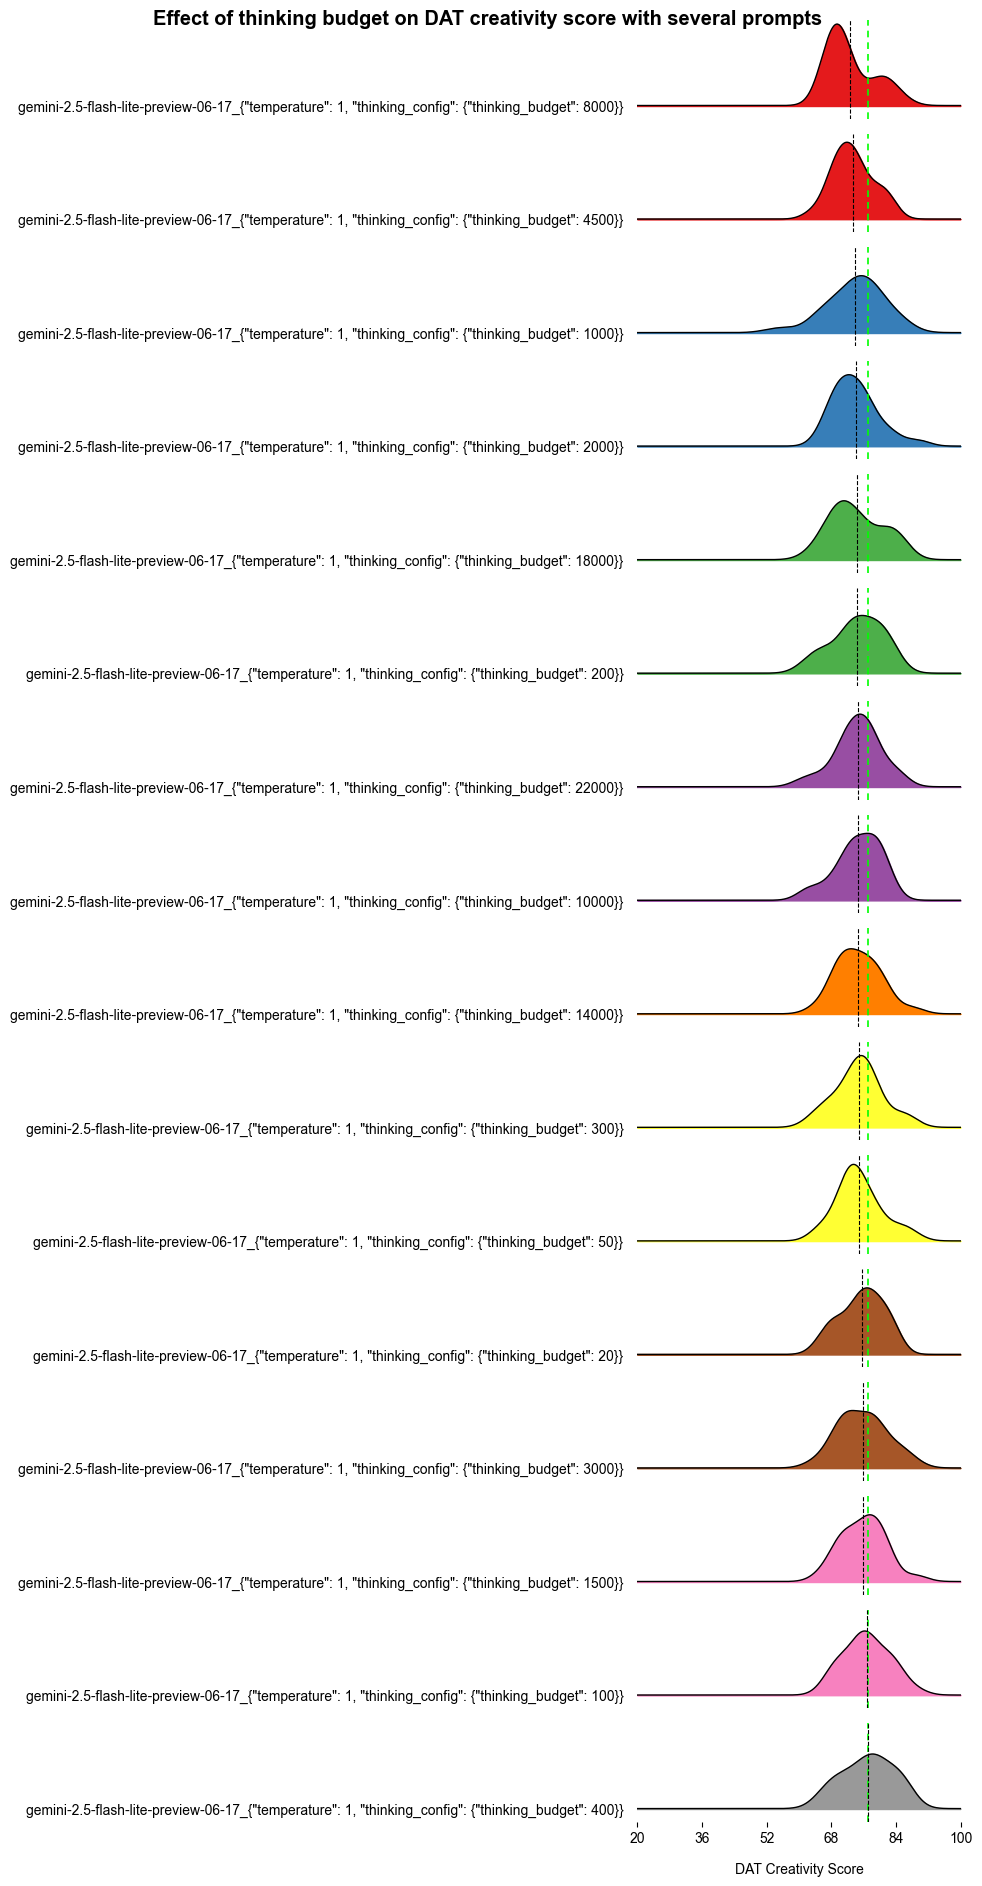

Benchmark (mean of top model 'gemini-2.5-flash-lite-preview-06-17_{"temperature": 1, "thinking_config": {"thinking_budget": 400}}'): 77.03


In [11]:
plot_distribution_results('results/DAT_1models_16configs_10words_06-18_00:15:12_unnormalized.json',
                          dark_mode=False,
                          plot_title="Effect of thinking budget on DAT creativity score with several prompts",
                          x_axis_title="DAT Creativity Score",
                          show_benchmark=True,
                          ascending=True,
                          x_min=20, 
                          x_max=100,
                          save_file=True, 
                          file_name="thinking_budget_effect_on_creativity.png",
)

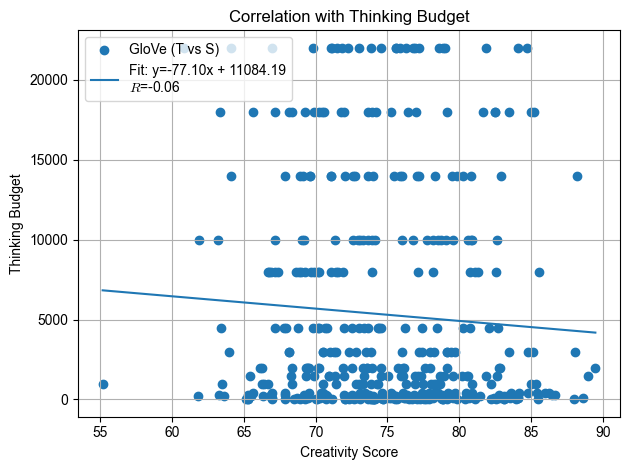

In [ ]:
plot_correlation('results/DAT_1models_16configs_10words_06-18_00:15:12_unnormalized.json',
                 key='thinking_config',
                 second_key="thinking_budget",
                 model=['GloVe'],
                 plot_title="Correlation with Thinking Budget",
                 x_axis_title="Creativity Score",
                 y_axis_title="Thinking Budget",
                 save_file=True, 
                 file_name="thinking_budget_effect_on_creativity_correlation.png")

### Comparisons between models at different temperatures

In [ ]:
test = DivergentAssociationTest(
    models=["gemini-2.0-flash-lite", 
            "gemini-2.0-flash", 
            "gemini-2.5-flash", 
            "gemini-2.5-flash-preview-04-17", 
            "gemini-2.5-flash-lite-preview-06-17"
    ],
    configs=[
        {"temperature": 0.5},
        {"temperature": 1},
        {"temperature": 1.5},
        {"temperature": 2},
    ],
    repeats=50,
    delay=7,
)

test.run(clean_response_file="./responses/DAT_5models_4configs_10words_06-18_12:03:59_clean.json")

['results/DAT_5models_4configs_10words_06-23_16:43:10_unnormalized.json',
 'results/DAT_5models_4configs_10words_06-23_16:43:10_normalized.json']

/opt/homebrew/anaconda3/envs/DeepLearning/lib/python3.13/site-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


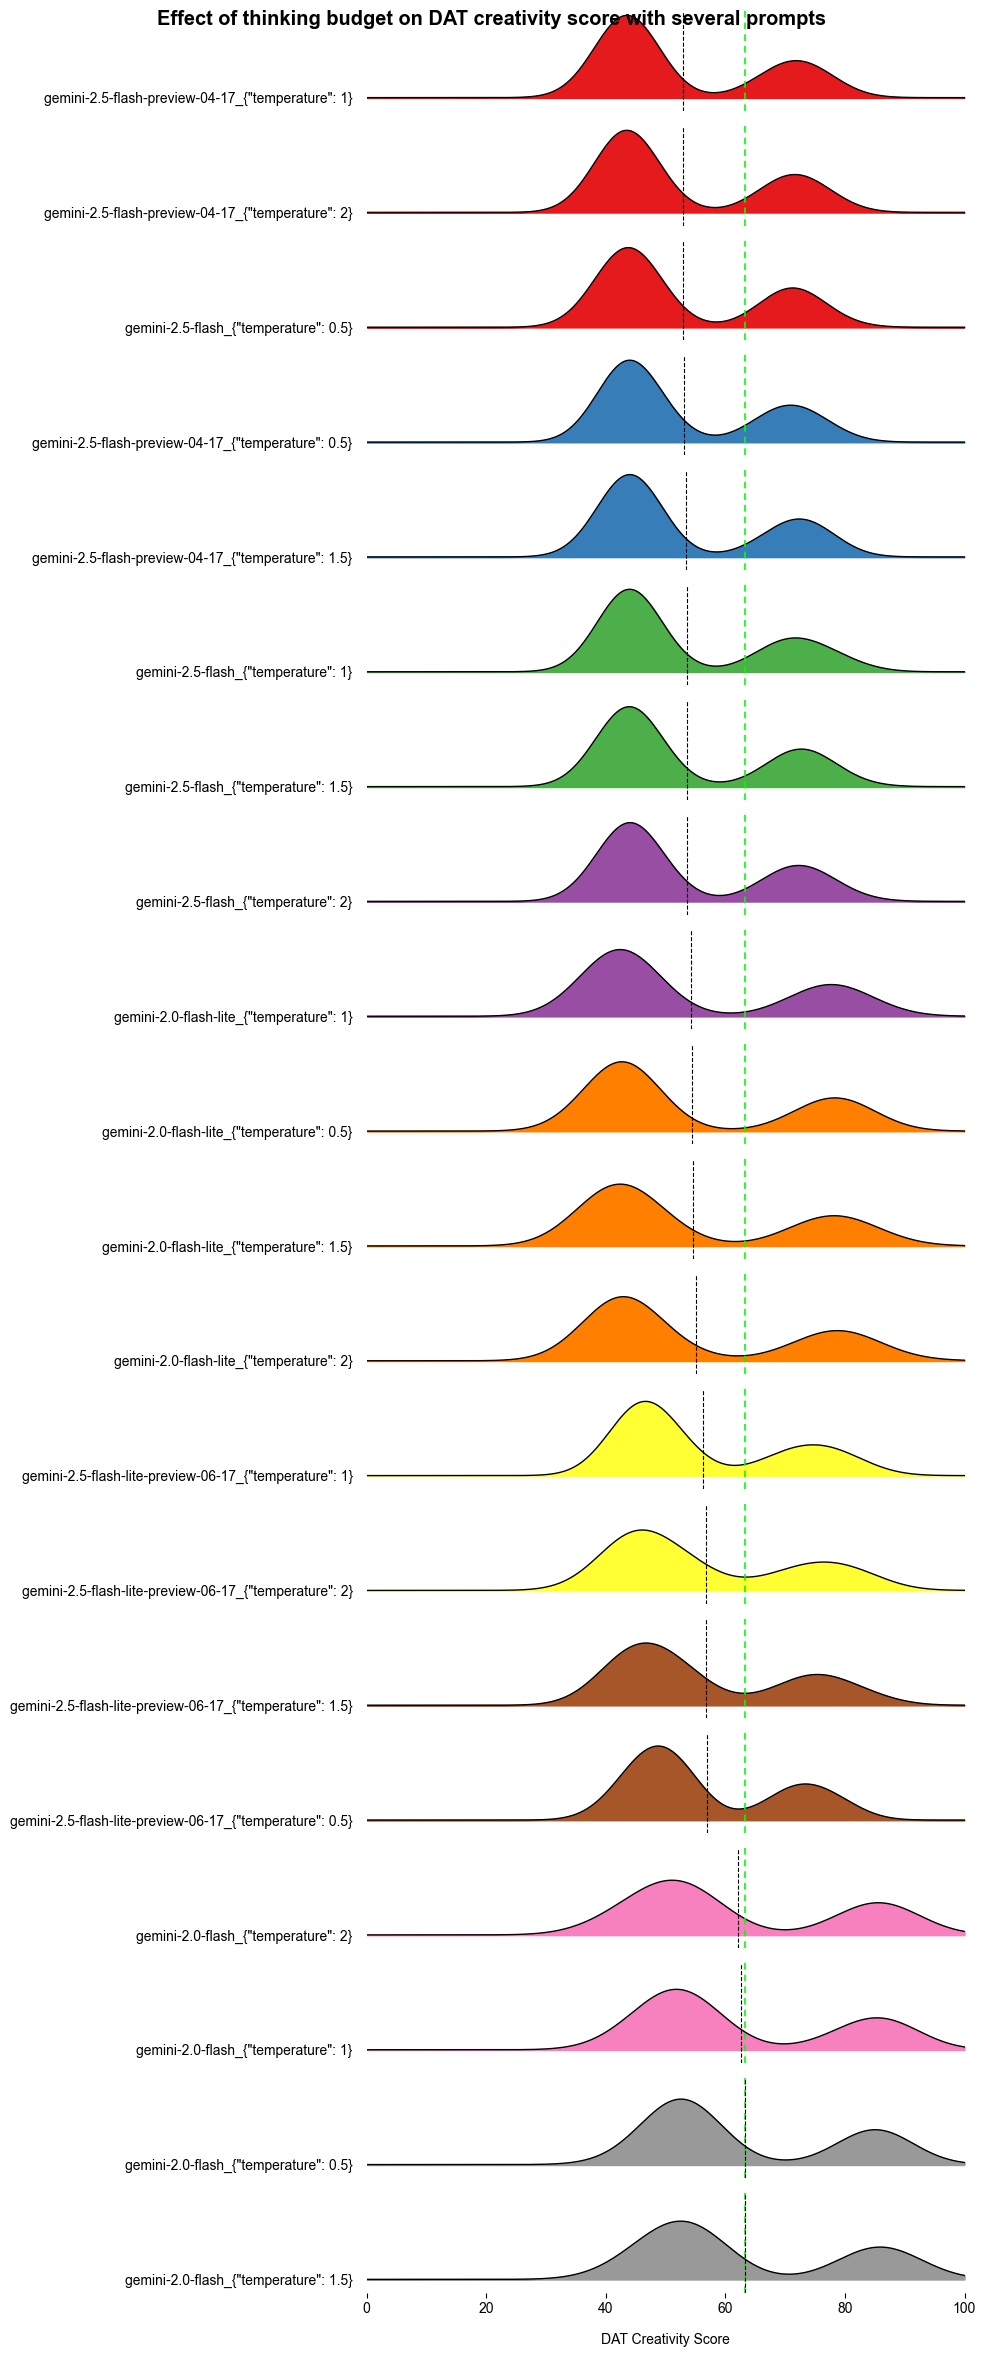

Benchmark (mean of top model 'gemini-2.0-flash_{"temperature": 1.5}'): 63.32


In [11]:
plot_distribution_results('results/DAT_5models_4configs_10words_06-23_16:02:48_unnormalized.json',
                          dark_mode=False,
                          embedding_model=['GloVe', 'BERT_WordEmbeddings_L6', 'BERT_WordEmbeddings_L7'],
                          plot_title="Effect of thinking budget on DAT creativity score with several prompts",
                          x_axis_title="DAT Creativity Score",
                          show_benchmark=True,
                          ascending=True,
                          x_min=0, 
                          x_max=100,
                          save_file=False, 
                          file_name="thinking_budget_effect_on_creativity.png",
)

/opt/homebrew/anaconda3/envs/DeepLearning/lib/python3.13/site-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


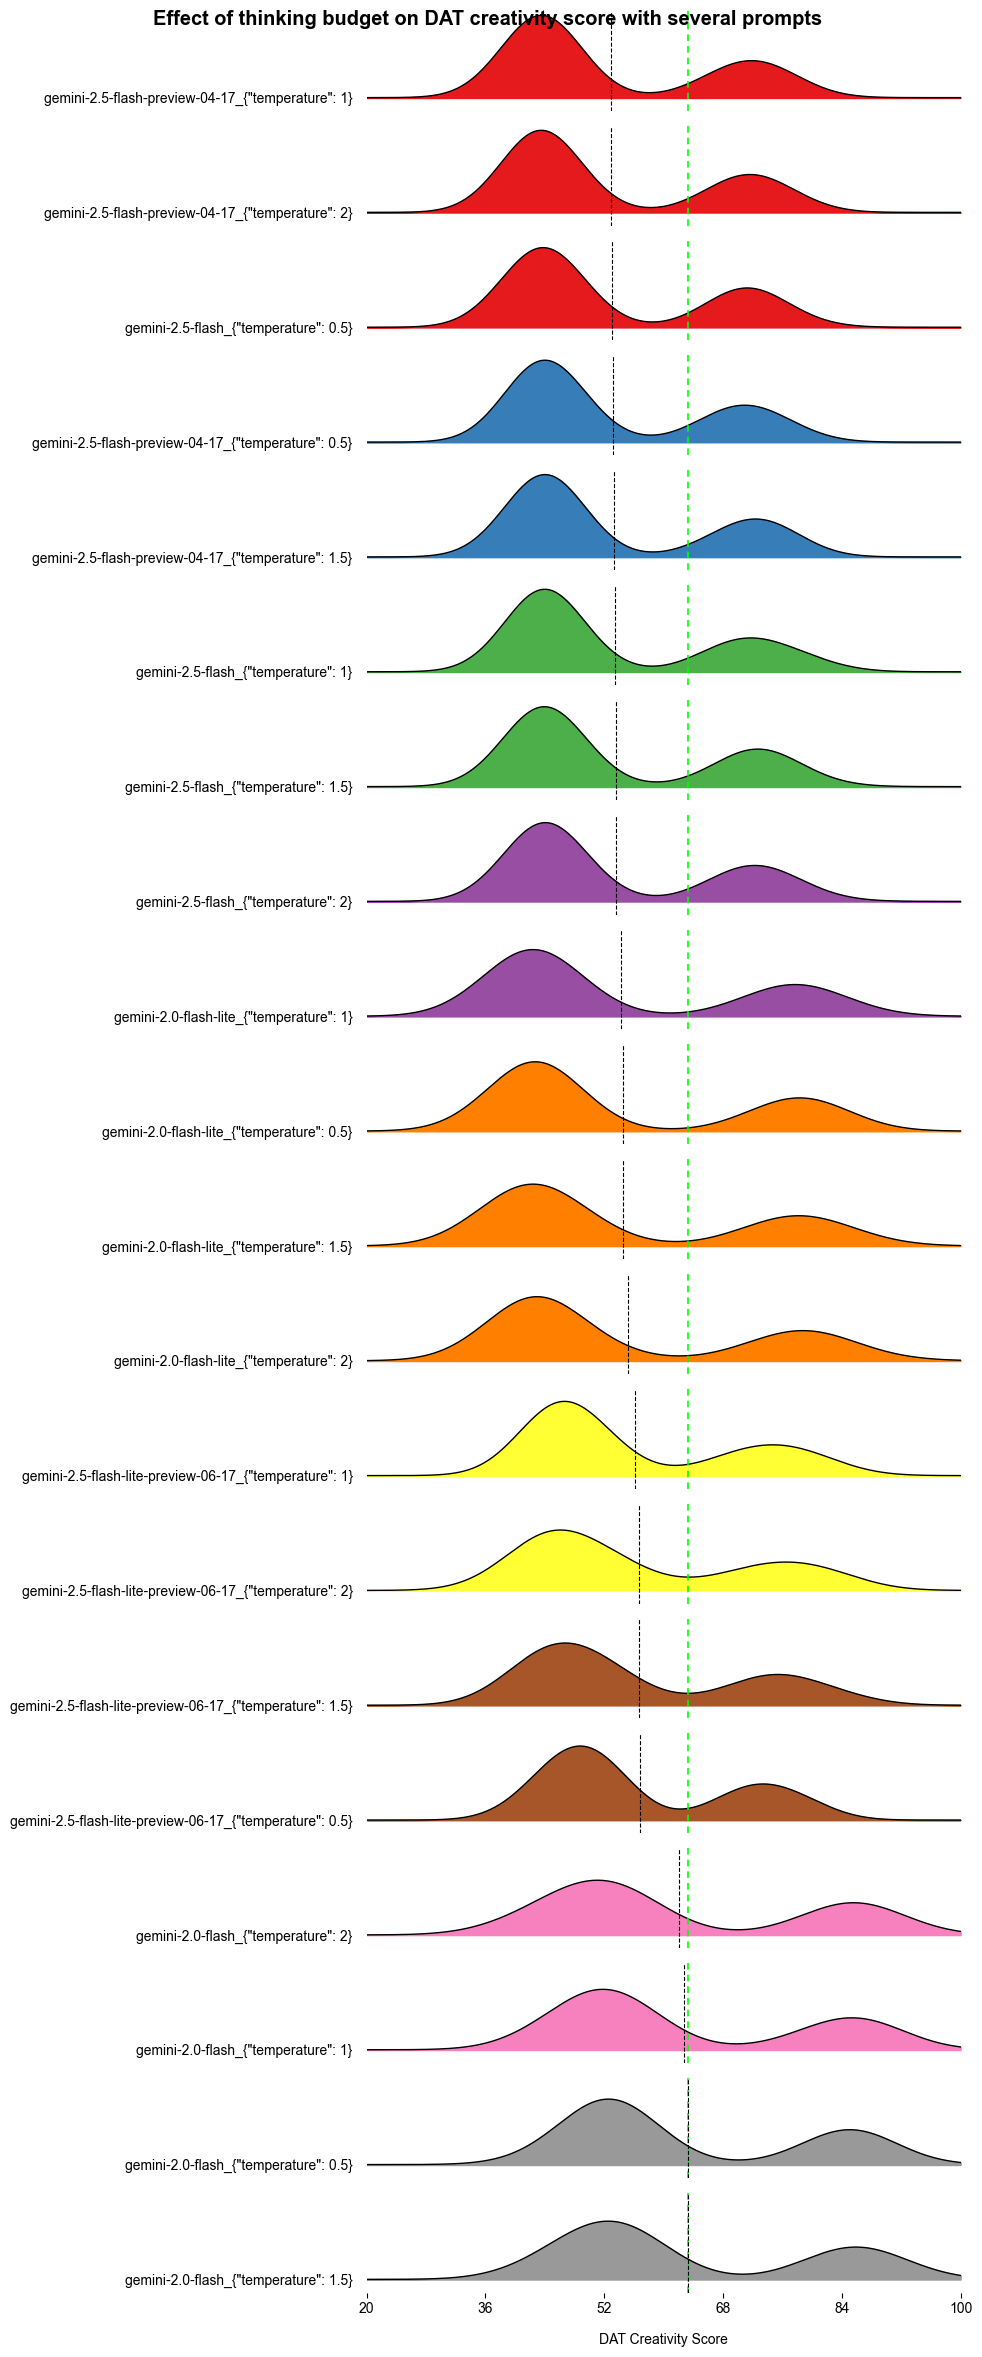

Benchmark (mean of top model 'gemini-2.0-flash_{"temperature": 1.5}'): 63.32


In [7]:
plot_distribution_results('results/DAT_5models_4configs_10words_06-23_16:02:48_unnormalized.json',
                          dark_mode=False,
                          plot_title="Effect of thinking budget on DAT creativity score with several prompts",
                          x_axis_title="DAT Creativity Score",
                          show_benchmark=True,
                          ascending=True,
                          x_min=20, 
                          x_max=100,
                          save_file=False, 
                          file_name="thinking_budget_effect_on_creativity.png",
)

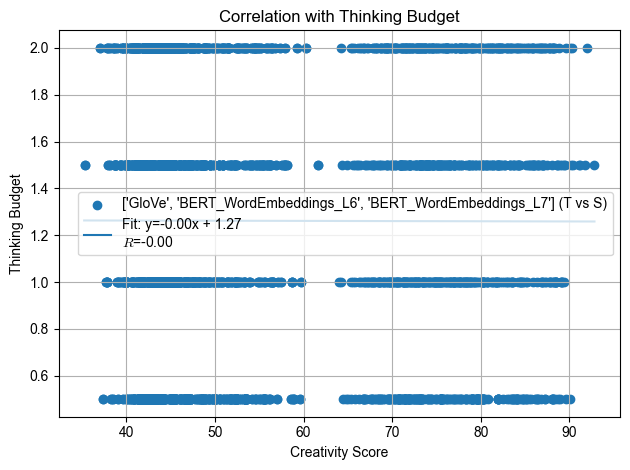

In [9]:
plot_correlation('results/DAT_5models_4configs_10words_06-23_16:02:48_unnormalized.json',
                 key='temperature',
                 second_key=None,
                 embedding_model=['GloVe', 'BERT_WordEmbeddings_L6', 'BERT_WordEmbeddings_L7'],
                 plot_title="Correlation with Thinking Budget",
                 x_axis_title="Creativity Score",
                 y_axis_title="Thinking Budget",
                 save_file=False, 
                 file_name="thinking_budget_effect_on_creativity_correlation.png")

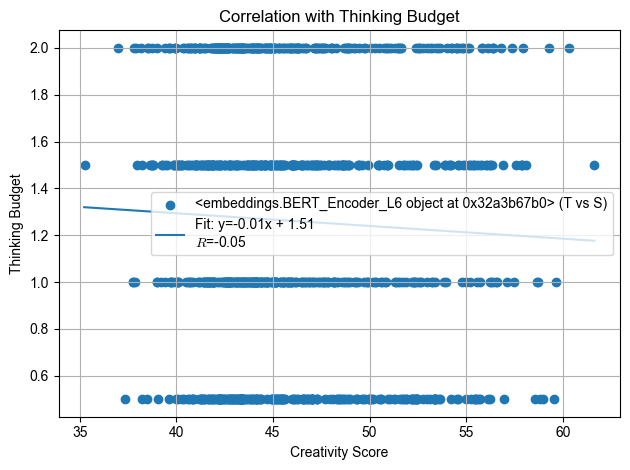

In [ ]:
plot_correlation('results/DAT_5models_4configs_10words_06-18_18:24:53_unnormalized.json',
                 key='temperature',
                 second_key=None,
                 model='<embeddings.BERT_Encoder_L6 object at 0x32a3b67b0>',
                 plot_title="Correlation with Thinking Budget",
                 x_axis_title="Creativity Score",
                 y_axis_title="Thinking Budget",
                 save_file=False, 
                 file_name="thinking_budget_effect_on_creativity_correlation.png")

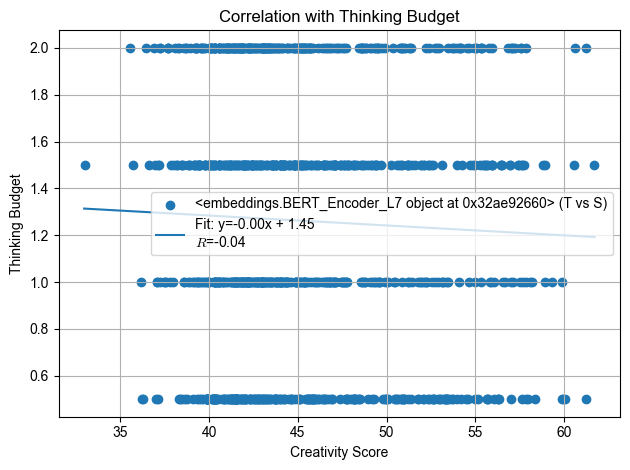

In [11]:
plot_correlation('results/DAT_5models_4configs_10words_06-18_18:24:53_unnormalized.json',
                 key='temperature',
                 second_key=None,
                 model="<embeddings.BERT_Encoder_L7 object at 0x32ae92660>",
                 plot_title="Correlation with Thinking Budget",
                 x_axis_title="Creativity Score",
                 y_axis_title="Thinking Budget",
                 save_file=False, 
                 file_name="thinking_budget_effect_on_creativity_correlation.png")
